## This implementation has been adapted from http://web.tuat.ac.jp/~yamanaka/pcoms2019/Cahn-Hilliard-2d.html which was developed by Yamanaka research group of Tokyo University of Agriculture and Technology in August 2019.

## Import Libraries

In [1]:
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt

## Initialize all constants

In [2]:
nx = 128 # number of computational grids along x direction
ny = nx # number of computational grids along y direction
dx, dy = 2.0e-9, 2.0e-9 # spacing of computational grids [m]
c0 = 0.5 # average composition of B atom [atomic fraction]
R = 8.314 # gas constant
temp = 673 # temperature [K]
nsteps = 2000# total number of time-steps

## Get all derived constants

In [3]:
La = 20000.-9.*temp # Atom intaraction constant [J/mol]
ac = 3.0e-14 # gradient coefficient [Jm2/mol]
Da = 1.0e-04*np.exp(-300000.0/R/temp) # diffusion coefficient of A atom [m2/s]
Db = 2.0e-05*np.exp(-300000.0/R/temp) # diffusion coefficient of B atom [m2/s]
dt = (dx*dx/Da)*0.1 # time increment [s]

## Intialize order parameter variable (Concentration of Atom-B) with zeros

In [4]:
c = np.zeros((nx,ny)) # order parameter c at time t
c_new = np.zeros((nx,ny)) # order parameter c at time t+dt

## Function to get subsequent information aboout Concentration of Atom-B over time.

In [5]:
def update_orderparameter(c,c_new):
    for j in range(ny):
        for i in range(nx):
            
            ip = i + 1
            im = i - 1
            jp = j + 1
            jm = j - 1
            ipp = i + 2
            imm = i - 2
            jpp = j + 2
            jmm = j - 2

            if ip > nx-1:  # periodic boundary condition
                ip = ip - nx
            if im < 0:
                im = im + nx
            if jp > ny-1:
                jp = jp - ny
            if jm < 0:
                jm = jm + ny
            if ipp > nx-1: 
                ipp = ipp - nx
            if imm < 0:
                imm = imm + nx
            if jpp > ny-1:
                jpp = jpp - ny
            if jmm < 0:
                jmm = jmm + ny
            
            cc = c[i,j] # at (i,j) "centeral point"
            ce = c[ip,j] # at (i+1.j) "eastern point"
            cw = c[im,j] # at (i-1,j) "western point"
            cs = c[i,jm] # at (i,j-1) "southern point"
            cn = c[i,jp] # at (i,j+1) "northern point"
            cse = c[ip,jm] # at (i+1, j-1)
            cne = c[ip,jp]
            csw = c[im,jm]
            cnw = c[im,jp]
            cee = c[ipp,j]  # at (i+2, j+1)
            cww = c[imm,j]
            css = c[i,jmm]
            cnn = c[i,jpp]
            
            mu_chem_c = R*temp*(np.log(cc)-np.log(1.0-cc)) + La*(1.0-2.0*cc) # chemical term of the diffusion potential
            mu_chem_w = R*temp*(np.log(cw)-np.log(1.0-cw)) + La*(1.0-2.0*cw) 
            mu_chem_e = R*temp*(np.log(ce)-np.log(1.0-ce)) + La*(1.0-2.0*ce) 
            mu_chem_n = R*temp*(np.log(cn)-np.log(1.0-cn)) + La*(1.0-2.0*cn)  
            mu_chem_s = R*temp*(np.log(cs)-np.log(1.0-cs)) + La*(1.0-2.0*cs) 

            mu_grad_c = -ac*( (ce -2.0*cc +cw )/dx/dx + (cn  -2.0*cc +cs )/dy/dy ) # gradient term of the diffusion potential
            mu_grad_w = -ac*( (cc -2.0*cw +cww)/dx/dx + (cnw -2.0*cw +csw)/dy/dy )
            mu_grad_e = -ac*( (cee-2.0*ce +cc )/dx/dx + (cne -2.0*ce +cse)/dy/dy )  
            mu_grad_n = -ac*( (cne-2.0*cn +cnw)/dx/dx + (cnn -2.0*cn +cc )/dy/dy ) 
            mu_grad_s = -ac*( (cse-2.0*cs +csw)/dx/dx + (cc  -2.0*cs +css)/dy/dy )              
            
            mu_c = mu_chem_c + mu_grad_c # total diffusion potental
            mu_w = mu_chem_w + mu_grad_w 
            mu_e = mu_chem_e + mu_grad_e 
            mu_n = mu_chem_n + mu_grad_n 
            mu_s = mu_chem_s + mu_grad_s 
    
            nabla_mu = (mu_w -2.0*mu_c + mu_e)/dx/dx + (mu_n -2.0*mu_c + mu_s)/dy/dy    
            dc2dx2 = ((ce-cw)*(mu_e-mu_w))/(4.0*dx*dx)
            dc2dy2 = ((cn-cs)*(mu_n-mu_s))/(4.0*dy*dy) 
            
            DbDa = Db/Da
            mob = (Da/R/temp)*(cc+DbDa*(1.0-cc))*cc*(1.0-cc) 
            dmdc = (Da/R/temp)*((1.0-DbDa)*cc*(1.0-cc)+(cc+DbDa*(1.0-cc))*(1.0-2.0*cc)) 
        
            dcdt = mob*nabla_mu + dmdc*(dc2dx2 + dc2dy2) # right-hand side of Cahn-Hilliard equation
            c_new[i,j] = c[i,j] + dcdt *dt # update order parameter c 

## Intial conditions defined

In [6]:
c = np.zeros((nx,ny)) # zero-clear
c_new = np.zeros((nx,ny)) # zero clear
c_init = c0 + np.random.randn(nx, ny)*0.05

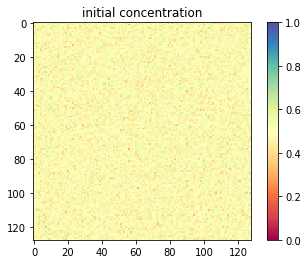

In [19]:
plt.imshow(c_init, cmap='Spectral')
plt.title('initial concentration')
plt.colorbar()
plt.clim(0, 1);
plt.show()

## Create time and concentration numpy arrays for final dataset creation

In [55]:
time = np.arange(nsteps+1)
Conc_B = c_init
c = c_init

## Update order parameter with time and 

nstep =  100
Maximum concentration =  0.5611870497793408
Minimum concentration =  0.4158945270213545


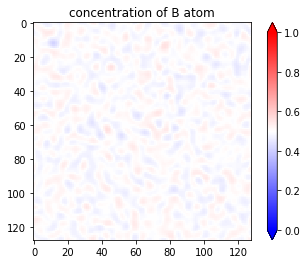

nstep =  200
Maximum concentration =  0.5715009852470282
Minimum concentration =  0.406168596078088


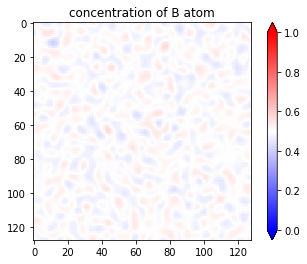

nstep =  300
Maximum concentration =  0.5846249034065109
Minimum concentration =  0.39158028884301765


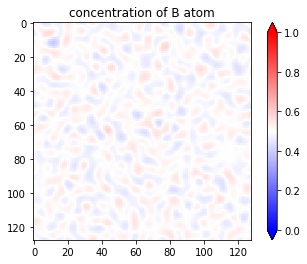

nstep =  400
Maximum concentration =  0.6028025252802912
Minimum concentration =  0.37364882535781285


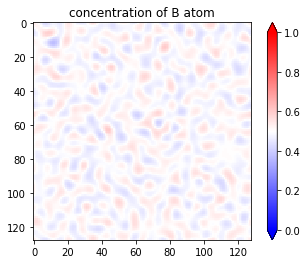

nstep =  500
Maximum concentration =  0.624722029547834
Minimum concentration =  0.3531168215304858


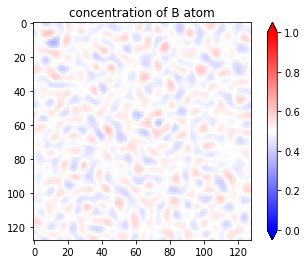

nstep =  600
Maximum concentration =  0.6498175325042005
Minimum concentration =  0.33081446385040464


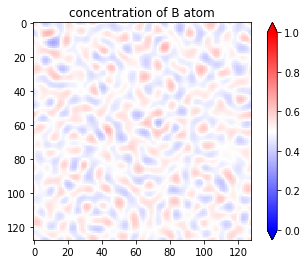

nstep =  700
Maximum concentration =  0.679525385303838
Minimum concentration =  0.30774957592541446


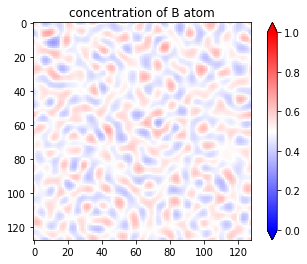

nstep =  800
Maximum concentration =  0.7111860529302323
Minimum concentration =  0.28499437617712114


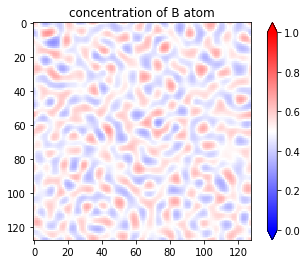

nstep =  900
Maximum concentration =  0.7401804326047322
Minimum concentration =  0.26350877055686733


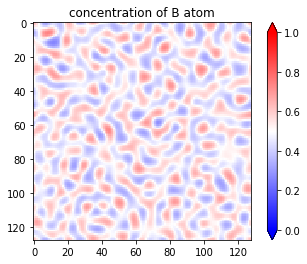

nstep =  1000
Maximum concentration =  0.764747209283038
Minimum concentration =  0.24400716412712617


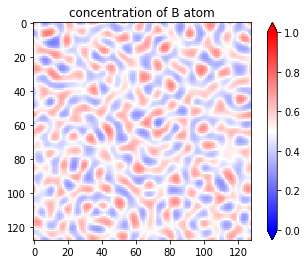

nstep =  1100
Maximum concentration =  0.7843988334889612
Minimum concentration =  0.22691689699885417


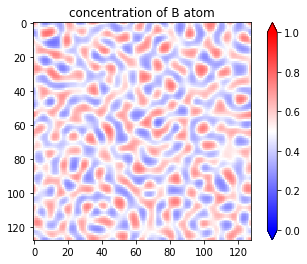

nstep =  1200
Maximum concentration =  0.7995717906397297
Minimum concentration =  0.21240931812889538


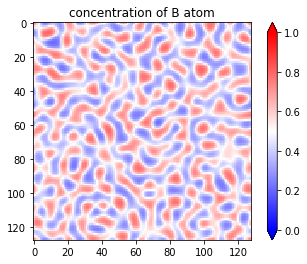

nstep =  1300
Maximum concentration =  0.8110679661791804
Minimum concentration =  0.20045857570828546


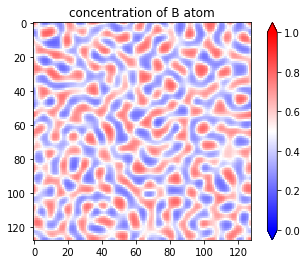

nstep =  1400
Maximum concentration =  0.8227312807393296
Minimum concentration =  0.19072839968950808


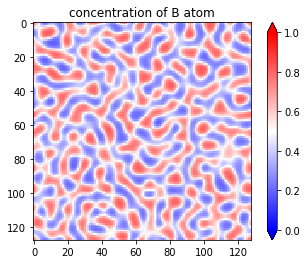

nstep =  1500
Maximum concentration =  0.8319040335339949
Minimum concentration =  0.1830119825887735


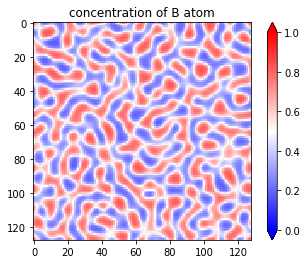

nstep =  1600
Maximum concentration =  0.8387990218764747
Minimum concentration =  0.17707233127298033


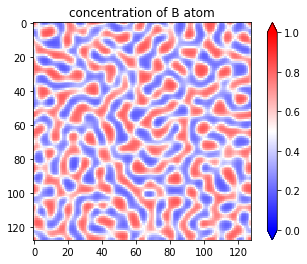

nstep =  1700
Maximum concentration =  0.8438875300044363
Minimum concentration =  0.17143224835012838


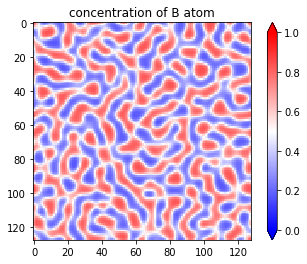

nstep =  1800
Maximum concentration =  0.8475609548416085
Minimum concentration =  0.1654009477067015


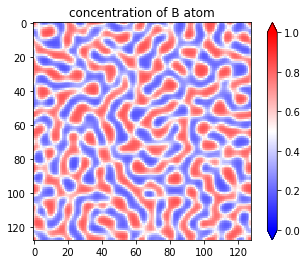

nstep =  1900
Maximum concentration =  0.8501526453271426
Minimum concentration =  0.1611211579034152


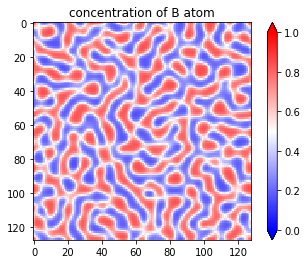

nstep =  2000
Maximum concentration =  0.8519439742331733
Minimum concentration =  0.15822158015050466


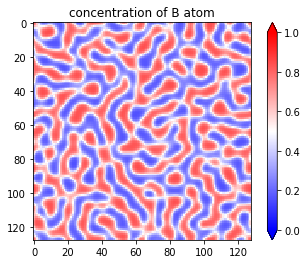

KeyboardInterrupt: 

In [56]:
for nstep in range(1,nsteps+1):
    update_orderparameter(c,c_new)
    Conc_B = np.dstack((Conc_B,c_new))
    c[:,:] = c_new[:,:] # swap c at time t and c at time t+dt
    
    if nstep % 100 == 0:
        print('time = ', nstep)
        print('Maximum concentration = ', np.max(c))
        print('Minimum concentration = ', np.min(c))
        plt.imshow(c, cmap='Spectral')
        plt.title('concentration of B atom')
        plt.colorbar()
        plt.clim(0, 1);
        plt.show()

In [73]:
np.save('Conc',Conc_B[:,:,:2001])

In [79]:
np.save('time',time[:2001])